In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
data_path = "C:/Users/Prakalp.Somawanshi/Local Store/QRM/Projects/ImgCmp/Code/data/mnist/"
train_data = np.loadtxt(data_path + "mnist_train.csv", 
                        delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv", 
                       delimiter=",") 
# test_data[:10]

In [2]:
print(test_data.shape)
print(train_data.shape)

(10000, 785)
(60000, 785)


In [3]:
# test_data=test_data[:10]
test_data.shape

(10000, 785)

In [4]:
len(test_data[1][1:])

784

In [5]:
pca = PCA(.95)

In [6]:
lower_dimensional_data = pca.fit_transform(train_data)

In [7]:
pca.n_components_ 

154

In [8]:
approximation = pca.inverse_transform(lower_dimensional_data)

In [9]:
len(approximation[1])

785

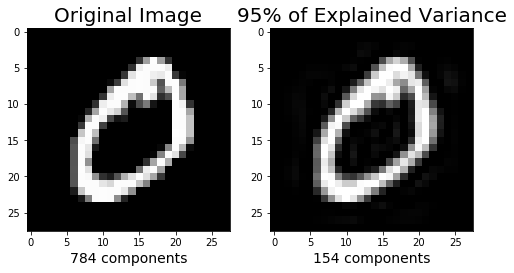

In [10]:
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(train_data[1][1:].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[1][1:].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);

In [11]:
# if n_components is not set all components are kept (784 in this case)
pca = PCA()

In [12]:
pca.fit(train_data)

PCA()

In [13]:
pca.n_components_

785

In [14]:
tot = sum(pca.explained_variance_)
tot

3428510.9226638624

In [15]:

var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[9.704646277635337, 7.095965545812454, 6.169075253168368, 5.389412512609538, 4.8688108848813885]


In [16]:
tot = sum(pca.explained_variance_)
tot

3428510.9226638624

In [17]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[9.704646277635337, 7.095965545812454, 6.169075253168368, 5.389412512609538, 4.8688108848813885]


In [18]:
# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

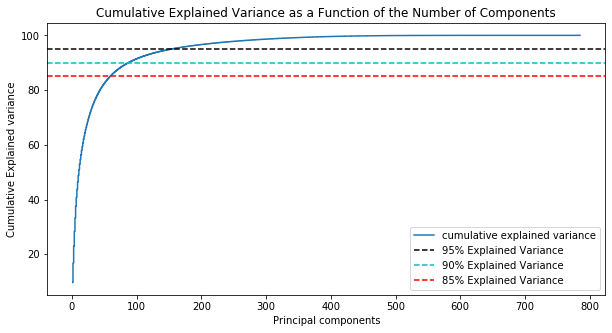

In [20]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.step(range(1, 786), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

In [21]:

# Indices corresponding to the first occurrence are returned with the np.argmax function
# Adding 1 to the end of value in list as principal components start from 1 and indexes start from 0 (np.argmax)
componentsVariance = [784, np.argmax(cum_var_exp > 99) + 1, np.argmax(cum_var_exp > 95) + 1, np.argmax(cum_var_exp > 90) + 1, np.argmax(cum_var_exp >= 85) + 1]

In [22]:
componentsVariance

[784, 331, 154, 87, 59]

In [23]:
from sklearn.decomposition import PCA

# This is an extremely inefficient function. Will get to why in a later tutorial
def explainedVariance(percentage, images): 
    # percentage should be a decimal from 0 to 1 
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal